<a href="https://colab.research.google.com/github/anshupandey/Computer-Vision/blob/master/DCGANs_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Modelling GANs

In [ ]:
from tensorflow.keras import models,layers

In [ ]:
# Generator
# generator will accept x arrays of size 100 where x = batchsize
gen_input = layers.Input(shape=100)
x = layers.Dense(128*7*7,activation="tanh")(gen_input)
x = layers.BatchNormalization()(x)
x = layers.Reshape((7,7,128))(x)
x = layers.UpSampling2D()(x)
x = layers.Conv2D(filters=64,kernel_size=(5,5),padding='same',activation='tanh')(x)
x = layers.BatchNormalization()(x)
x = layers.UpSampling2D()(x)
gen_output = layers.Conv2D(filters=1,kernel_size=(5,5),padding='same',activation='tanh')(x)

gen_model = models.Model(inputs=gen_input,outputs=gen_output)
gen_model.compile(loss="binary_crossentropy",optimizer='adam')
gen_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
batch_normalization (BatchNo (None, 6272)              25088     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 64)        204864    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)       

In [ ]:
# Discriminator
dis_input = layers.Input(shape=(28,28,1))
x = layers.Conv2D(filters=64,kernel_size=(5,5),padding='same',strides=(2,2),activation='relu')(dis_input)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(filters=128,kernel_size=(5,5),padding='same',strides=(2,2),activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Flatten()(x)
dis_output = layers.Dense(1,activation='sigmoid')(x)

dis_model = models.Model(inputs=dis_input,outputs=dis_output)
dis_model.compile(loss="binary_crossentropy",optimizer='adam')
dis_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [ ]:
# creating GAN model using both generator and discriminators
# create input for GAN
dis_model.trainable = False
gan_input = layers.Input(shape=(100,))
x = gen_model(gan_input)
gan_output = dis_model(x)
gan = models.Model(inputs=gan_input,outputs=gan_output)
gan.compile(loss="binary_crossentropy",optimizer='adam')
gan.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
functional_1 (Functional)    (None, 28, 28, 1)         865281    
_________________________________________________________________
functional_3 (Functional)    (None, 1)                 212865    
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


In [ ]:
xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)
xtrain = xtrain.astype('float32')
# scale the images
xtrain = (xtrain - 127.5) / 127.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# training the model
epochs = 30
batch_size=100
batch_count = xtrain.shape[0]//batch_size

for i in range(epochs):
  loss= []
  for j in range(batch_count):
    # random input for generator
    noise_input = np.random.rand(batch_size,100)
    # preparing input training for discriminator
    gen_prediction = gen_model.predict(noise_input,batch_size=batch_size)
    real_images = xtrain[np.random.randint(0,xtrain.shape[0],batch_size)]
    X_dis = np.concatenate([gen_prediction,real_images])
    Y_dis = np.array([0]*batch_size + [1]*batch_size).reshape(-1,1)

    ######################################################
    ##### Train the model ##################
    dis_model.trainable = True
    dis_model.train_on_batch(X_dis,Y_dis)

    ##### Train the generator #####
    noise_input = np.random.rand(batch_size,100)
    y_generator = np.array([[1]*batch_size]).reshape(-1,1)
    dis_model.trainable = False
    model_loss = gan.train_on_batch(noise_input,y_generator)
    loss.append(model_loss)
  print("Epoch ",i," completed")
  print("Loss of GAN is ",sum(loss)/len(loss))


Epoch  0  completed
Loss of GAN is  2.7545197832584383
Epoch  1  completed
Loss of GAN is  2.760203860998154
Epoch  2  completed
Loss of GAN is  2.767752176920573
Epoch  3  completed
Loss of GAN is  2.774210633635521
Epoch  4  completed
Loss of GAN is  2.825265235503515
Epoch  5  completed
Loss of GAN is  2.8610292824109393
Epoch  6  completed
Loss of GAN is  2.8332913064956666
Epoch  7  completed
Loss of GAN is  2.867006407578786
Epoch  8  completed
Loss of GAN is  2.8773827334245046
Epoch  9  completed
Loss of GAN is  2.9050774534543353
Epoch  10  completed
Loss of GAN is  2.939447913169861
Epoch  11  completed
Loss of GAN is  2.929205592870712
Epoch  12  completed
Loss of GAN is  2.9770156147082645
Epoch  13  completed
Loss of GAN is  2.9691380059719084
Epoch  14  completed
Loss of GAN is  2.979128489891688
Epoch  15  completed
Loss of GAN is  2.9880035758018493
Epoch  16  completed
Loss of GAN is  3.0150118307272593
Epoch  17  completed
Loss of GAN is  3.0159582380453744
Epoch  18 

(50, 28, 28, 1)


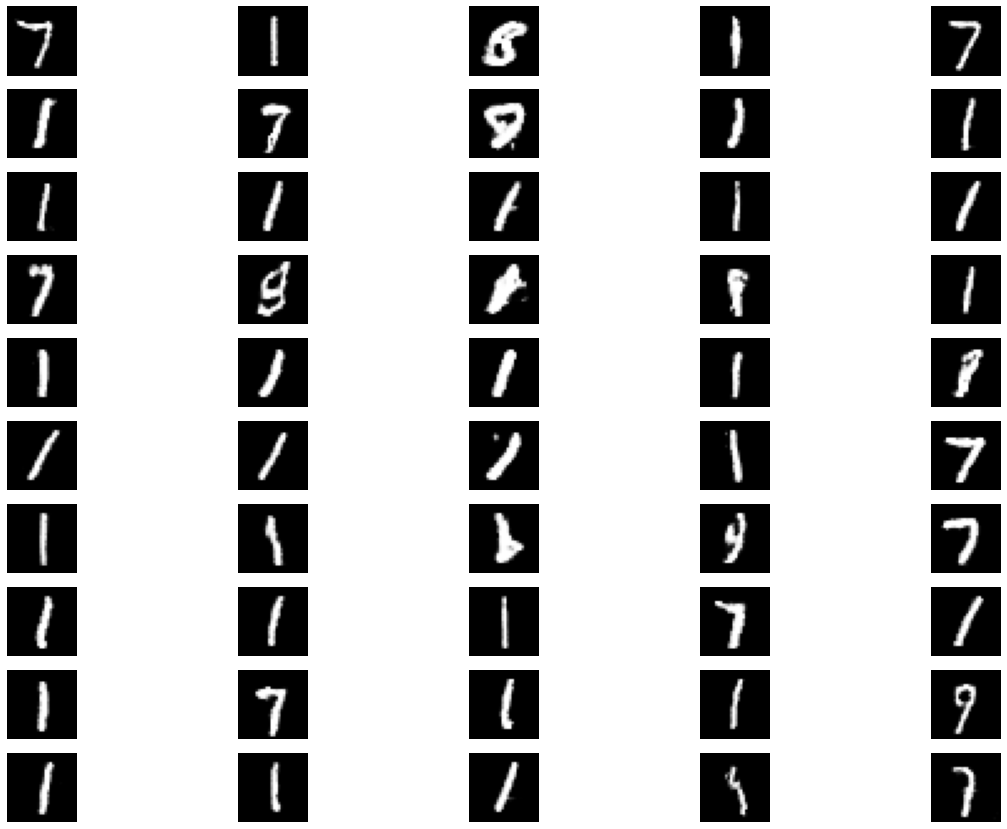

In [ ]:
noise_input = np.random.rand(50,100)
prediction = gen_model.predict(noise_input)
print(prediction.shape)
plt.figure(figsize=(20,15))
for i in range(50):
  plt.subplot(10,5,i+1)
  plt.imshow(prediction[i,:,:,0],cmap='gray')
  plt.axis('off')
plt.show()